# 2.2 Generating Dataset 3144523574

# Initial Setup

## Jupyter Extensions

Load [watermark](https://github.com/rasbt/watermark) to see the state of the machine and environment that's running the notebook. To make sense of the options, take a look at the [usage](https://github.com/rasbt/watermark#usage) section of the readme.

In [1]:
# Load `watermark` extension
%load_ext watermark

In [2]:
# Display the status of the machine and other non-code related info
%watermark -m -g -b -h

Compiler    : GCC 13.3.0
OS          : Linux
Release     : 5.15.0-119-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

Hostname: apra-desktop-ubuntu

Git hash: fcc0779ae0ff7dd6c7cbe1712865ee2354eb4023

Git branch: human



Load [autoreload](https://ipython.org/ipython-doc/3/config/extensions/autoreload.html) which will always reload modules marked with `%aimport`.

This behavior can be inverted by running `autoreload 2` which will set everything to be auto-reloaded *except* for modules marked with `%aimport`.

In [3]:
# Load `autoreload` extension
%load_ext autoreload

In [4]:
# Set autoreload behavior
%autoreload 1

Load `matplotlib` in one of the more `jupyter`-friendly [rich-output modes](https://ipython.readthedocs.io/en/stable/interactive/plotting.html). Some options (that may or may not have worked) are `inline`, `notebook`, and `gtk`.

In [5]:
# Set the matplotlib mode
%matplotlib inline

## Imports

In [209]:
# Standard library imports
import pickle
from pathlib import Path
from datetime import datetime

# Third party
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%aimport hmdcpd.visualization
%aimport hmdcpd.analysis
from hmdcpd import (
    visualization, 
    analysis,
)

%aimport bouncing_ball_task.bouncing_ball
%aimport bouncing_ball_task.human_bouncing_ball
%aimport bouncing_ball_task.utils.pyutils
%aimport bouncing_ball_task.utils.taskutils
%aimport bouncing_ball_task.utils.visualize
%aimport bouncing_ball_task.utils.gif
from bouncing_ball_task.utils import pyutils, visualize
from bouncing_ball_task import human_bouncing_ball as hbb
from bouncing_ball_task import index

# Display  versions of everything
%watermark -v -iv

Python implementation: CPython
Python version       : 3.12.6
IPython version      : 8.27.0

matplotlib        : 3.9.2
cv2               : 4.10.0
numpy             : 2.1.1
pandas            : 2.2.3
seaborn           : 0.13.2
bouncing_ball_task: 0.0.0



In [184]:
# Suppress sci notation
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Function Definitions

In [185]:
def plot_effective_stats(df_data):
    # Create the subplots
    palette = visualize.get_color_palette(
        ["Low", "High"],
        (("Blues", 1), ("Reds", 1)),
        linspace_range=(0.75, 1),
    )
    palette_trial = visualize.get_color_palette(
        ["Straight", "Catch", "Bounce"],
        (("Blues", 1), ("Wistia", 1), ("Reds", 1)),
        linspace_range=(0.75, 1),
    )
    palette_contingency = visualize.get_color_palette(
        ["Low", "Medium", "High"],
        (("Blues", 1), ("Wistia", 1), ("Reds", 1)),
        linspace_range=(0.75, 1),
    )
    
    plot_params = [
        [
            (
                "PCCNVC_effective",
                "Observed Hazard Rates",
                "Effective Hazard Rate Bins",
                {
                    "hue": "Hazard Rate",
                    "legend": False,
                    "palette": palette,
                }
            ),
            (
                "Color Change Random",
                "Number of Random Color Changes",
                "Random Color Change Bins",
                {
                    "hue": "Hazard Rate",
                    "legend": True,
                    "discrete": True,
                    "palette": palette,
                }
            ),
            (
                "length",
                "Distribution of Video Lengths",
                "Video Length Bins",
                {
                    "hue": "trial",
                    "legend": True,
                    "palette": palette_trial,
                }
            ),
        ],
        [
            (
                "PCCOVC_effective",
                "Observed Trial Contingency",
                "Effective Contingency Bins",
                {
                    "hue": "Contingency",
                    "palette": palette_contingency,
                    "legend": False,
                },
            ),
            (
                "Color Change Bounce",
                "Number of Bounce Color Changes",
                "Bounce Color Changes",
                {
                    "discrete": True,
                    "hue": "Contingency",
                    "palette": palette_contingency,
                    "legend": True,
                }
            ),
            (
                "Bounces",
                "Number of Bounces",
                "Number of Bounces",
                {
                    "discrete": True,
                    "hue": "trial",
                    "palette": palette_trial,
                    "legend": True,
                }
            ),
        ],
    ]
    
    rows = 2
    fig, axes = plt.subplots(
        rows,
        len(plot_params[0]),
        figsize=(len(plot_params[0])*4, rows*4),
    )
    
    for i, row_plots in enumerate(plot_params):
        for j, (col, title, xlabel, plot_dict) in enumerate(row_plots):
            ax = axes[i, j]
            sns.histplot(
                df_data,
                x=col,
                ax=ax,
                **plot_dict,
            )
            ax.set_title(title)
            ax.set_xlabel(xlabel)
            if j != 0:
                ax.set_ylabel(None)
    
    plt.suptitle(f"Task Statstics for {batch_size} Videos")
    plt.tight_layout()
    plt.show()

# Loading Task Instance

2024-10-17 18:34:41.070 | DEBUG    | bouncing_ball_task.bouncing_ball:color_mask_mode:486 - Running color_mask_mode setter
2024-10-17 18:34:41.071 | DEBUG    | bouncing_ball_task.bouncing_ball:transitioning_change_mode:464 - Running transitioning_change_mode setter
2024-10-17 18:34:41.072 | DEBUG    | bouncing_ball_task.bouncing_ball:sequence_mode:419 - Running sequence_mode setter
2024-10-17 18:34:41.072 | DEBUG    | bouncing_ball_task.bouncing_ball:resample_change_probabilities:512 - Running resample_change_probabilities
2024-10-17 18:34:41.073 | DEBUG    | bouncing_ball_task.bouncing_ball:color_sampling:396 - Running color_sampling setter
2024-10-17 18:34:41.075 | DEBUG    | bouncing_ball_task.bouncing_ball:return_change_mode:450 - Running return_change_mode setter


Dataset Generation Summary
  Num Total Trials: 351 (39 min 58.3 sec)
    length_trials_ms:       2398290
    video_length_min_ms:    6000
    video_length_max_ms:    14130
    video_length_min_f:     200
    video_length_max_f:     471
    ball_radius:            10
    dt:                     0.1
    duration:               30
    exp_scale:              1.0
    border_tolerance_outer: 1.25
    mask_center:            0.5
    mask_fraction:          0.3333333333333333
    size_x:                 256
    size_y:                 256
    num_pos_endpoints:      5
    pvc:                    0.0
    num_y_velocities:       2
    bounce_offset:          0.4
    seed:                   3144523574
  Num Catch Trials: 20 (2 min 0.0 sec)
    Min Video Length (s):  6.0
    Max Video Length (s):  6.0
    Color Splits:          [np.float64(0.35), np.float64(0.3), np.float64(0.35)]
    pccnvc Splits:         [np.float64(0.5), np.float64(0.5)]
    pccovc Splits:         [np.float64(0.35), np.float6

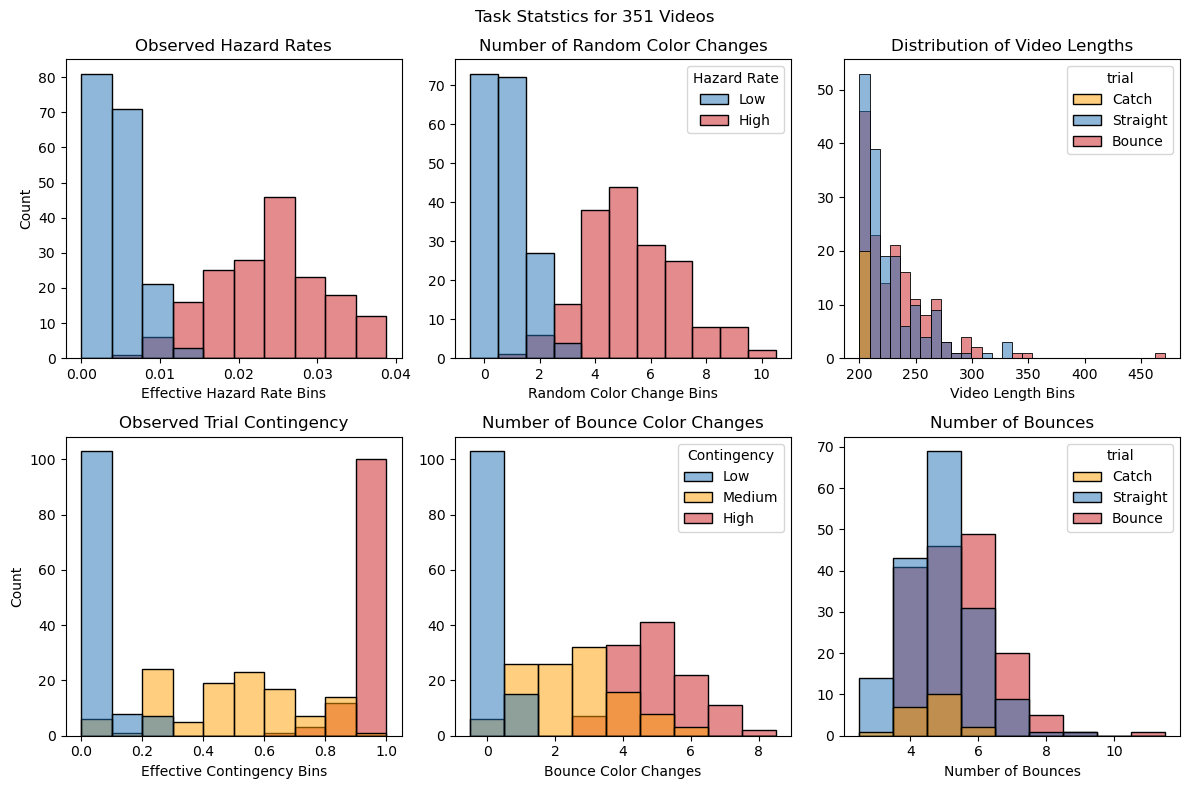

/home/apra/work/hmdcpd-analysis/src/hmdcpd/analysis.py:444: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group_outer, df_metadata_group_outer in df_metadata_trials.groupby(groupby_outer):
/home/apra/work/hmdcpd-analysis/src/hmdcpd/analysis.py:318: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group, df_metadata_group in df_metadata_trials.groupby(groupby):


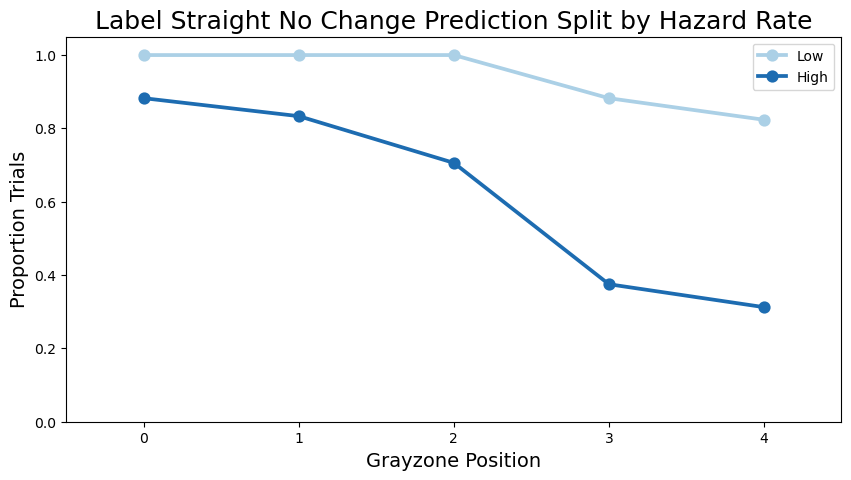

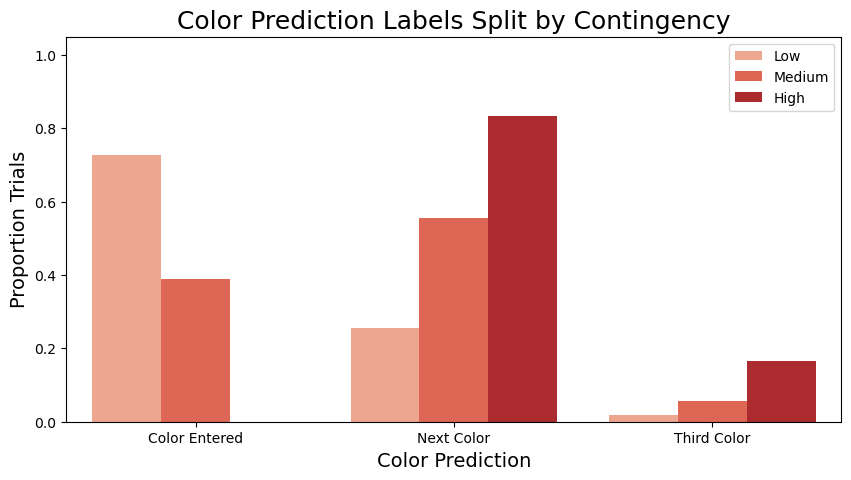

Using seed: 3144523574


In [311]:
# Task Parameters
batch_size = None
human_video_parameters = {
    "size_frame": (size_frame := (256, 256)),
    "ball_radius": (ball_radius := 10),
    "dt": (dt := 0.1),
    "total_dataset_length": (total_dataset_length := 40),
    "video_length_min_s": (video_length_min_s := 6.0),
    # "total_videos": (batch_size := 10000),
    "mask_center": (mask_center := 0.5),
    "mask_fraction": (mask_fraction := 1 / 3),
    "velocity_lower": (velocity_lower := 1 / 12.5),
    "velocity_upper": (velocity_upper := 1 / 7.5),
    "num_y_velocities": (num_y_velocities := 2),
    "pccnvc_lower": (pccnvc_upper := 0.00575),
    "pccnvc_upper": (pccnvc_upper := 0.0575),
    "pccovc_lower": (pccovc_lower := 0.025),
    "pccovc_upper": (pccovc_upper := 0.975),
    "num_pccnvc": (num_pccnvc := 2),
    "num_pccovc": (num_pccovc := 3),
    "pvc": (probability_velocity_change := 0.0),
    "num_pos_endpoints": (num_pos_endpoints := 5),
    "p_catch_trials": (p_catch_trials := 0.05),
    "bounce_offset": (bounce_offset := 2/5),
    "border_tolerance_outer": (border_tolerance_outer := 1.25),
    "border_tolerance_inner": (border_tolerance_inner := 1.0),
    "bounce_straight_split": (bounce_straight_split := 0.5),
    "duration": (duration := 30),
    "use_logger": False,
    "print_stats": True,
    "seed": (seed := pyutils.set_global_seed(3144523574)),
    "exp_scale": (exp_scale := 1.0),
}

task_parameters = {
    "size_frame": size_frame,
    "ball_radius": ball_radius,
    "target_future_timestep": (target_future_timestep := 0),
    "dt": dt,
    "sample_mode": (sample_mode := "parameter_array"),
    "target_mode": (target_mode := "parameter_array"),
    "mask_center": mask_center,
    "mask_fraction": mask_fraction,
    "mask_color": (mask_color := [127, 127, 127]),
    "sequence_mode": (sequence_mode := "reverse"),
    "debug": (debug := True),
    "sample_velocity_discretely": (sample_velocity_discretely := True),
    "return_change": (return_change := True),
    "return_change_mode": (return_change_mode := "source"),
    "min_t_color_change": (min_t_color_change := 15),
    "color_mask_mode": (color_mask_mode := "inner"),
    "initial_timestep_is_changepoint": (initial_timestep_is_changepoint := False),
    "seed": seed,
}

num_blocks = 25
size_x, size_y = size_frame

task, list_samples, list_targets, df_data, dict_metadata = hbb.generate_video_dataset(
    human_video_parameters,
    task_parameters,
    shuffle=False,
    num_blocks=num_blocks,
)
mask_start = task.mask_start
mask_end = task.mask_end
mask_color = task.mask_color
samples = task.samples
targets = task.targets

if batch_size is None:
    batch_size = samples.shape[0]

df_metadata_trials_straight = df_data[
    df_data["trial"] == "Straight"
]
df_metadata_trials_bounce = df_data[
    df_data["trial"] == "Bounce"
]

plot_effective_stats(df_data)

df_nested_position_counts_straight_hazard_label_straight = analysis.response_nested_no_change_prediction_counts(
    df_metadata_trials_straight,
    df_metadata_trials_straight,
    groupby_outer='Hazard Rate',
    label_func_outer=lambda x: x,
    label_title_outer="Hazard Rate",
    groupby_inner='idx_time',
    label_func_inner=lambda pos: str(pos),
    label_title_inner="Grayzone Position",
    as_df=True,
    response_column='correct_response',
)

title = "Label Straight No Change Prediction Split by Hazard Rate"
visualization.plot_color_prediction_counts(
    df_nested_position_counts_straight_hazard_label_straight,
    title,
    hue="Hazard Rate",
    x="Grayzone Position",
    y="No Change",
    palette_labels=["Low", "High"],
    palette_color_counts=(("Blues", 2),),
    palette_linspace_range=(0.333, 1.2),
    plot=sns.pointplot,
    # legend_loc=legend_loc,
)

df_color_counts_contingency_label = analysis.response_color_prediction_counts(
    df_metadata_trials_bounce,
    df_metadata_trials_bounce,
    'Contingency',
    label_func=lambda x: x,
    label_title="Contingency",
    as_df=True,
    response_column='correct_response',
)

title = "Color Prediction Labels Split by Contingency"
visualization.plot_color_prediction_counts(
    df_color_counts_contingency_label,
    title,
    hue="Contingency",
    palette_labels=["Low", "Medium", "High"],
    palette_color_counts=(("Reds", 3),),
    palette_linspace_range=(0.333, 1.0),
)

plt.show()
print(f"Using seed: {seed}")

# Saving the Dataset

In [312]:
dir_base = index.dir_data
name_dataset = "_".join([
    "hbb_dataset",
    datetime.now().strftime("%y%m%d_%H%M%S"),
    str(seed),
])

# name_dataset = "test"
dir_dataset = dir_base / name_dataset
dir_all_videos = dir_dataset / "videos"
dryrun = False
sample_columns = ["x", "y", "r", "g", "b"]
target_columns = sample_columns + ["vc_bounce", "vc_random", "cc_bounce", "cc_random"]

animation_parameters = {
    "duration": duration,
    "mode": (mode := "original"),
    "multiplier": (multiplier := 2),
    "animate_as_sample": (animate_as_sample := True),
    "save_target": True,
    "save_animation": True,
    "display_animation": False,
    "num_sequences": 1,
    "as_mp4": True,
    "include_timestep": False,
    "return_path": True,
    # "sample_thickness": 2,
}

In [313]:
for block_num, df_block in df_data.groupby("Block"):
    dir_block = dir_all_videos / f"block_{block_num}"
    for video_id, video_row in df_block.sort_values(by='Block Video Index').iterrows():
        block_video_index = video_row["Block Video Index"]
        sample = list_samples[video_id]
        target = list_targets[video_id]
        
        dir_video = dir_block / f"video_{block_video_index}"

        msg = f"Generating video files in /dir_videos/{dir_block.stem}/video_{block_video_index}"
        if dryrun:
            msg = f"  Dryrun - {msg}"
            print(msg)
        elif not dir_video.exists():
            dir_video.mkdir(parents=True)

        timestamps = np.arange(video_row["length"]) * duration
        target_df = pd.DataFrame(
            target, 
            index=timestamps, 
            columns=target_columns,
        )
        target_df.index.name = "Timestamp"
        path_target_df = dir_video / f"video_{block_video_index}_parameters.csv"

        sample_df = pd.DataFrame(
            sample, 
            index=timestamps, 
            columns=sample_columns,
        )
        sample_df.index.name = "Timestamp"
        path_sample_df = dir_video / f"video_{block_video_index}_samples.csv"

        color_changed_df = pd.DataFrame(
            np.logical_or(target[:, -2], target[:, -1]),
            index=timestamps, 
            columns=["Color Changed"],
        )
        color_changed_df.index.name = "Timestamp"
        path_color_change_df = dir_video / f"video_{block_video_index}_color_change.csv"

        if dryrun:
            print(f"    Dryrun - Saving target df as {path_target_df.stem}.csv")
            print(f"    Dryrun - Saving sample df as {path_sample_df.stem}.csv")
            print(f"    Dryrun - Saving color change df as {path_color_change_df.stem}.csv")
        else:
            target_df.to_csv(str(path_target_df))
            sample_df.to_csv(str(path_sample_df))
            color_changed_df.to_csv(str(path_color_change_df))

        target_color = video_row["Final Color"]
        video_name = f"video_{block_video_index}_{target_color}"
        path_video_mp4 = dir_video / f"{video_name}.mp4"

        if dryrun:
            print(f"    Dryrun - Saving video in {path_video_mp4.stem}.mp4")
        else:
            path_video, _ = task.animate(
                target,
                path_dir=dir_video,
                name=video_name,
                **animation_parameters,
            )

OpenCV: FFMPEG: tag 0x34363248/'H264' is not supported with codec id 27 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x31637661/'avc1'
OpenCV: FFMPEG: tag 0x34363248/'H264' is not supported with codec id 27 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x31637661/'avc1'
OpenCV: FFMPEG: tag 0x34363248/'H264' is not supported with codec id 27 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x31637661/'avc1'
OpenCV: FFMPEG: tag 0x34363248/'H264' is not supported with codec id 27 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x31637661/'avc1'
OpenCV: FFMPEG: tag 0x34363248/'H264' is not supported with codec id 27 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x31637661/'avc1'
OpenCV: FFMPEG: tag 0x34363248/'H264' is not supported with codec id 27 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x31637661/'avc1'
Open

In [314]:
path_df_trial_meta = dir_dataset / "trial_meta.csv"
msg = f"Saving trial metadata to to {path_df_trial_meta}"
if dryrun:
    msg = f"Dryrun - {msg}"
    print(msg)
else:
    print(msg)
    df_data.to_csv(str(path_df_trial_meta))

path_dataset_meta = dir_dataset / "dataset_meta.pkl"
msg = f"Saving dataset metadata to to {path_dataset_meta}"
if dryrun:
    msg = f"Dryrun - {msg}"
    print(msg)
else:
    print(msg)
    with open(str(path_dataset_meta), "wb") as handle:
        pickle.dump(dict_metadata, handle, protocol=pickle.HIGHEST_PROTOCOL)


Saving trial metadata to to /home/apra/work/Bouncing-Ball-Task/data/hbb_dataset_241017_183557_3144523574/trial_meta.csv
Saving dataset metadata to to /home/apra/work/Bouncing-Ball-Task/data/hbb_dataset_241017_183557_3144523574/dataset_meta.pkl
